# Data Loading

In [133]:
import numpy as np
import matplotlib.pyplot as plt

# init_angle = 79.495 * np.pi / 180
# u_init_angle = 0.047 * np.pi / 180

# March 13 number:
init_angle = 80.298477 * np.pi / 180
u_init_angle = 0.0653968006 * np.pi / 180

# March 20 number:
# init_angle = 77.313665 * np.pi / 180
# u_init_angle = 0.1026828899 * np.pi / 180


# data.txt contains the following columns:
# voltage, current, current uncertainty, angle, empty, empty, area, area_min, area_max
data = np.loadtxt('data_mar13.txt', skiprows=1)

voltage = data[:, 0]
current = data[:, 1]
current_uncertainty = data[:, 2]
angle = data[:, 3]
area = data[:, 4]
area_min = data[:, 5]
area_max = data[:, 6]

# import package that computes uncertainties using partial derivatives
import uncertainties as unc
import uncertainties.umath as umath
from uncertainties import unumpy as unp

# voltages are certain has 0 uncertainty
voltage = unp.uarray(voltage, 0)

# currents are uncertain
current = unp.uarray(current, current_uncertainty)

# angle convert to radians
angle = angle * np.pi / 180
# angles use init_angle as reference, and use u_init_angle as uncertainty
angle = unp.uarray(angle, u_init_angle)
# init angle is uncertain
init_angle = unc.ufloat(init_angle, u_init_angle)
# subtract angle from init_angle
angle = init_angle - angle

# compute n = sqrt((2/sqrt(3) * sin(angle) + 0.5)**2 + 3/4)
# only size-1 arrays can be converted to Python scalars
n = unp.sqrt((2/3**0.5 * unp.sin(angle) + 0.5)**2 + 3/4)
A = unc.ufloat(13900, 100)
B = unc.ufloat(1.689, 0.001)
print(n)
wavelength = unp.sqrt(A / (n - B))
print("wavelength:")
print(wavelength)

T0 = unc.ufloat(293, 0.1)
R0 = unc.ufloat(1.1, 0.1)
alpha0 = unc.ufloat(4.5e-3, 0.1e-3)

T = T0 + ((voltage/current)/R0 - 1) / alpha0

print("T:")
print(T)

# compute area
area = unp.uarray(area, (area_max - area_min) / 2)


[1.7111358566021546+/-0.0008594852971297753
 1.711795723041776+/-0.0008579134092114645
 1.714329427161349+/-0.0008518309641606774
 1.7150767079504985+/-0.0008500226892829742
 1.715542928622318+/-0.0008488911820351598
 1.7158223078032804+/-0.0008482118988692007
 1.716008527978332+/-0.0008477586068936676
 1.7163805780354648+/-0.0008468517344256026
 1.7163805780354648+/-0.0008468517344256026
 1.7170306383665521+/-0.0008452632361913973
 1.7172162108846334+/-0.0008448088371705392
 1.7178647917202068+/-0.0008432174392644952
 1.718512057849313+/-0.0008416241898977929]
wavelength:
[792.4269436532938+/-23.773412408955718
 780.8735530386037+/-22.74115464302858
 740.7893261514965+/-19.3932385263157
 730.0977643561292+/-18.55986159216326
 723.6573550820943+/-18.06966004617044
 719.8787089667102+/-17.786148642335274
 717.3926828160611+/-17.60126417183472
 712.502010173059+/-17.241331203751297
 712.502010173059+/-17.241331203751297
 704.1917064521255+/-16.64115088255254
 701.8722206758628+/-16.47618

# Calculate Fit

In [134]:
def compute_line_fit_m_um_b_ub(xs, ys, xerror, yerror):
    """

    :param xs:
    :param ys:
    :param xerror:
    :param yerror:
    :return: (slope, uncertainty in slope, intercept, uncertainty in intercept)
    """
    N = len(xs)
    b = (np.sum(xs**2) * np.sum(ys) - np.sum(xs) * np.sum(xs * ys)) / (N * np.sum(xs**2) - np.sum(xs)**2)
    m = (N * np.sum(xs * ys) - np.sum(xs) * np.sum(ys)) / (N * np.sum(xs**2) - np.sum(xs)**2)
    delta = np.sum(1/(yerror**2)) * np.sum(xs**2 / yerror**2) - (np.sum(xs / yerror**2))**2
    db = np.sqrt(1 / delta * np.sum(xs**2 / yerror**2))
    dm = np.sqrt(1 / delta * np.sum(1 / yerror**2))
    return m, dm, b, db

def chi_squared(xs, ys, m, b, yerror):
    chi_sq = sum((ys - m * xs - b) ** 2 / yerror ** 2)
    return chi_sq

# PLOT

[2248.8931634403334+/-203.48837605897282
 2360.6793120118055+/-214.42838046586462
 2470.0675879939536+/-224.57819159896084
 2556.4849614715386+/-232.1041664756482
 2660.7803677803677+/-241.83298816810125
 2745.1796375156864+/-249.6947141846364
 2838.1778054517777+/-258.76952975247127
 2929.554221459882+/-267.2835389845406
 3014.6058582178803+/-275.20675606726286
 3093.9674206857308+/-282.598773810982
 3162.9237270665844+/-288.6794890549805
 3242.995826028884+/-296.48343829430775
 3313.4776496911327+/-303.051938805114]
[792.4269436532938+/-23.773412408955718
 780.8735530386037+/-22.74115464302858
 740.7893261514965+/-19.3932385263157
 730.0977643561292+/-18.55986159216326
 723.6573550820943+/-18.06966004617044
 719.8787089667102+/-17.786148642335274
 717.3926828160611+/-17.60126417183472
 712.502010173059+/-17.241331203751297
 712.502010173059+/-17.241331203751297
 704.1917064521255+/-16.64115088255254
 701.8722206758628+/-16.476183683567854
 693.9420201976569+/-15.92049989151253
 686.2

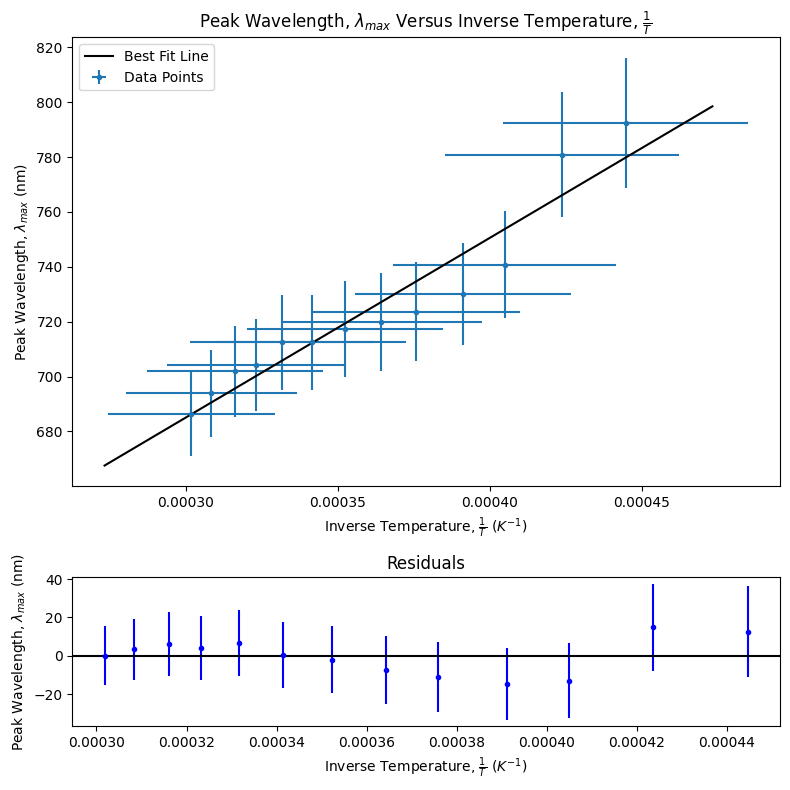

m, dm, b, db
654657.1113353344 122384.48877564297 488.6975407871731 43.20015238811914
^ that was value in nm
6.546571113353343e-05 1.2238448877564296e-05 4.8869754078717314e-08 4.320015238811915e-09
0.002298 is the expected value for m
chi squared
2.726750346860998
reduced chi squared
0.24788639516918165


In [135]:
# Plot peak wavelength vs 1/T
# plot a line of best fit
# plot error bars
T_value = np.array([t.n for t in T])
T_u = np.array([t.s for t in T])
T_inv = 1/T
T_inv_value = np.array([t.n for t in T_inv])
T_inv_u = np.array([t.s for t in T_inv])
wavelength_n = np.array([w.n for w in wavelength])
wavelength_u = np.array([w.s for w in wavelength])
print(T)
print(wavelength)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [3, 1]})
# ax1.set_aspect('equal')
ax1.errorbar(T_inv_value, wavelength_n, xerr=T_inv_u, yerr=wavelength_u, fmt='.', label='Data Points')
m, dm, b, db = compute_line_fit_m_um_b_ub(T_inv_value, wavelength_n, T_inv_u, wavelength_u)
x = np.linspace(min(T_inv_value) - 0.2 * ( max(T_inv_value) - min(T_inv_value)), max(T_inv_value)+ 0.2 * ( max(T_inv_value) - min(T_inv_value)), 1000)
y = m * x + b
ax1.plot(x, y, label='Best Fit Line', color='black')
ax1.legend(loc='upper left')
ax1.set_xlabel('Inverse Temperature, $\\frac{1}{T}$ ($K^{-1}$)')
ax1.set_ylabel('Peak Wavelength, $\\lambda_{max}$ (nm)')
ax1.set_title('Peak Wavelength, $\\lambda_{max}$ Versus Inverse Temperature, $\\frac{1}{T}$')

ax2.errorbar(T_inv_value, wavelength_n - (m * T_inv_value + b),yerr=wavelength_u, fmt=".",
                color="blue")
ax2.axhline(y=0, color="black")
ax2.set_xlabel('Inverse Temperature, $\\frac{1}{T}$ ($K^{-1}$)')
ax2.set_ylabel('Peak Wavelength, $\\lambda_{max}$ (nm)')
ax2.set_title("Residuals")

fig.tight_layout()
plt.show()



# plt.xlabel('Inverse Temperature, $\\frac{1}{T}$ ($K^{-1}$)')
# plt.ylabel('Peak Wavelength, $\\lambda_{max}$ (nm)')
# plt.title('Peak Wavelength, $\\lambda_{max}$ Versus Inverse Temperature, $\\frac{1}{T}$')
# # best location for legend
# plt.legend(loc='upper left')
# plt.show()
print("m, dm, b, db")
print(m, dm, b, db)
print("^ that was value in nm")
print(m/10e9, dm/10e9, b/10e9, db/10e9)
print(2.298e-3, "is the expected value for m")

print("chi squared")
print(chi_squared(T_inv_value, wavelength_n, m, b, wavelength_u))
print("reduced chi squared")
print(chi_squared(T_inv_value, wavelength_n, m, b, wavelength_u) / (len(T_inv_value) - 2))

[2.2728+/-0.07305000000000006 2.6751+/-0.029249999999999998
 3.6354+/-0.06060000000000021 4.2458+/-0.04640000000000022
 5.4044+/-0.07559999999999967 6.1775+/-0.03905000000000003
 6.4364+/-0.0970500000000003 7.5684+/-0.12009999999999987
 8.4951+/-0.11165000000000003 9.5686+/-0.08830000000000027
 10.7646+/-0.12164999999999981 11.5775+/-0.12014999999999976
 12.8277+/-0.15254999999999974]
[0.8210125515578411+/-0.03214097148891238
 0.9839867628268064+/-0.010934170685208027
 1.2907191461968615+/-0.016669417395609894
 1.4459302590157643+/-0.010928446935795425
 1.6872134366036668+/-0.01398860187994961
 1.820913658880628+/-0.006321327397814655
 1.861969377602858+/-0.015078304642346699
 2.023981684475469+/-0.015868611595581613
 2.139489526684981+/-0.013142870595990631
 2.2584869042722473+/-0.009228100244549911
 2.3762629726712565+/-0.011300930828827807
 2.44906355937277+/-0.010377888145109026
 2.5516068952150674+/-0.011892233214060178]
[7.718193446802655+/-0.09048378970020898
 7.766704700673298+

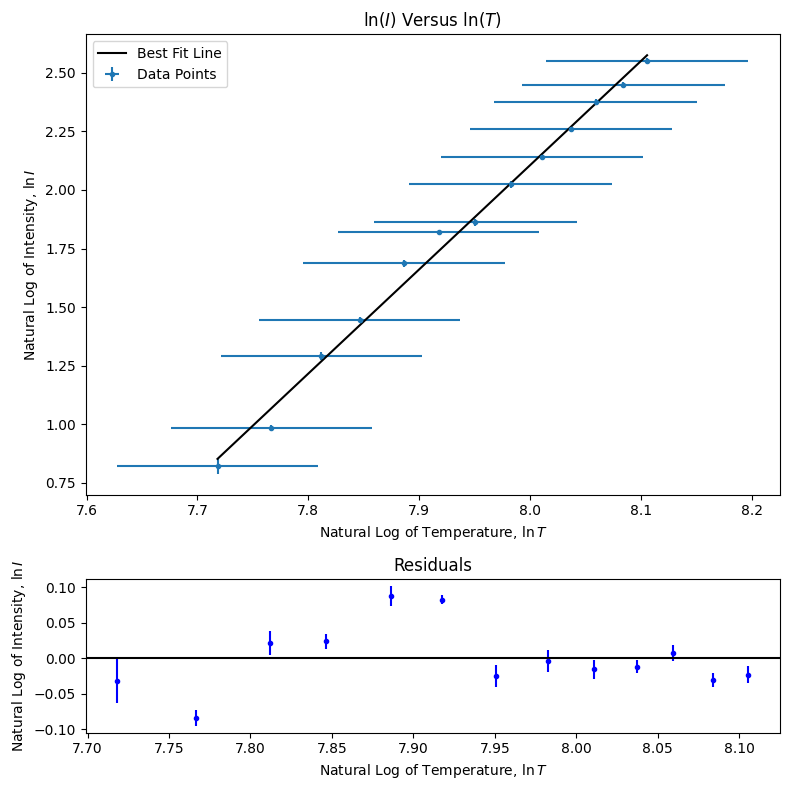

m, dm, b, db
4.445018113453224 0.030373841643333278 -33.455351785098586 0.24162936332577478
chi squared
293.6111317257905
reduced chi squared
26.691921065980953


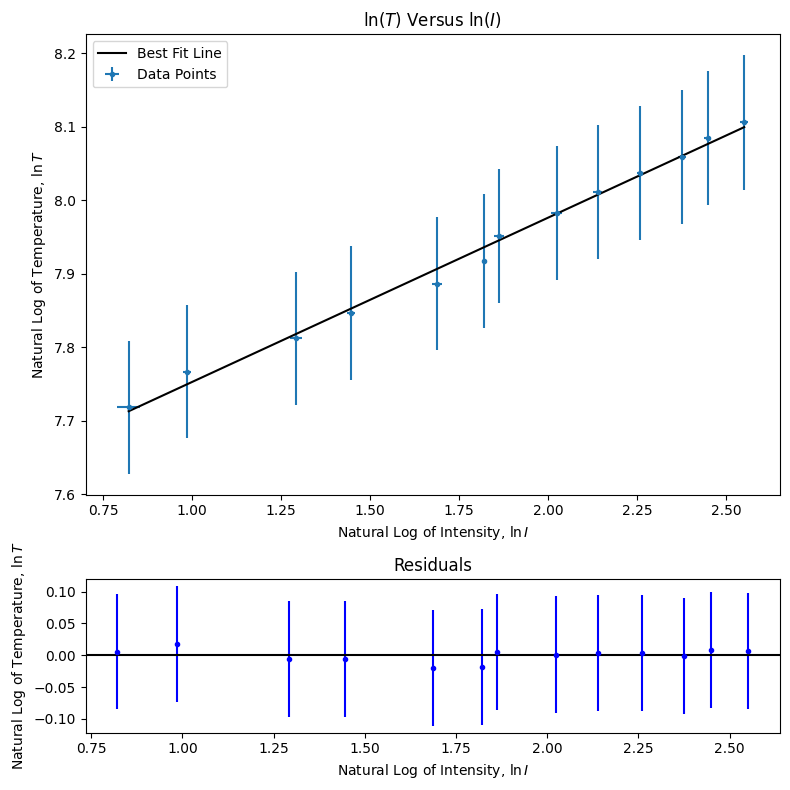

m, dm, b, db
0.22339651790572035 0.04721481685547249 7.529354287404833 0.08960273217753277
chi squared
0.15789040132263682
reduced chi squared
0.014353672847512438


In [136]:
# log log plot of area vs temperature
# plot a line of best fit
# plot error bars
log_area = unp.log(area)
log_area_value = np.array([a.n for a in log_area])
log_area_u = np.array([a.s for a in log_area])
log_T = unp.log(T)
log_T_value = np.array([t.n for t in log_T])
log_T_u = np.array([t.s for t in log_T])
print(area)
print(log_area)
print(log_T)
# plot log(area) vs log(T)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [3, 1]})
# ax1.set_aspect('equal')
ax1.errorbar(log_T_value, log_area_value, xerr=log_T_u, yerr=log_area_u, fmt='.', label='Data Points')
m, dm, b, db = compute_line_fit_m_um_b_ub(log_T_value, log_area_value, log_T_u, log_area_u)
x = np.linspace(min(log_T_value), max(log_T_value), 1000)
y = m * x + b
ax1.plot(x, y, label='Best Fit Line', color='black')
ax1.legend(loc='upper left')
ax1.set_xlabel('Natural Log of Temperature, $\\ln{T}$')
ax1.set_ylabel('Natural Log of Intensity, $\\ln{I}$')
ax1.set_title('$\\ln({I})$ Versus $\\ln({T})$')

ax2.errorbar(log_T_value, log_area_value - (m * log_T_value + b),yerr=log_area_u, fmt=".",
                color="blue")
ax2.axhline(y=0, color="black")
ax2.set_xlabel('Natural Log of Temperature, $\\ln{T}$')
ax2.set_ylabel('Natural Log of Intensity, $\\ln{I}$')
ax2.set_title("Residuals")

fig.tight_layout()
plt.show()


# plt.errorbar(log_T_value, log_area_value, xerr=log_T_u, yerr=log_area_u, fmt='o')
# m, dm, b, db = compute_line_fit_m_um_b_ub(log_T_value, log_area_value, log_T_u, log_area_u)
# x = np.linspace(min(log_T_value), max(log_T_value), 1000)
# y = m * x + b
# plt.plot(x, y, label='y = {:.3f}x + {:.3f}'.format(m, b))
# plt.xlabel('log(T)')
# plt.ylabel('log(Area)')
# plt.title('log(Area) vs log(T)')
# plt.show()
print("m, dm, b, db")
print(m, dm, b, db)
print("chi squared")
print(chi_squared(log_T_value, log_area_value, m, b, log_area_u))
print("reduced chi squared")
print(chi_squared(log_T_value, log_area_value, m, b, log_area_u) / (len(log_T_value) - 2))



# Plot inverse
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [3, 1]})
# ax1.set_aspect('equal')
ax1.errorbar(log_area_value, log_T_value, xerr=log_area_u, yerr=log_T_u, fmt='.', label='Data Points')
m, dm, b, db = compute_line_fit_m_um_b_ub(log_area_value, log_T_value , log_area_u,  log_T_u )
x = np.linspace(min(log_area_value), max(log_area_value), 1000)
y = m * x + b
ax1.plot(x, y, label='Best Fit Line', color='black')
ax1.legend(loc='upper left')
ax1.set_ylabel('Natural Log of Temperature, $\\ln{T}$')
ax1.set_xlabel('Natural Log of Intensity, $\\ln{I}$')
ax1.set_title('$\\ln({T})$ Versus $\\ln({I})$')

ax2.errorbar(log_area_value, log_T_value - (m * log_area_value + b),yerr=log_T_u , fmt=".",
                color="blue")
ax2.axhline(y=0, color="black")
ax2.set_ylabel('Natural Log of Temperature, $\\ln{T}$')
ax2.set_xlabel('Natural Log of Intensity, $\\ln{I}$')
ax2.set_title("Residuals")

fig.tight_layout()
plt.show()


# plt.errorbar(log_area_value, log_T_value, xerr=log_area_u, yerr=log_T_u, fmt='o')
# m, dm, b, db = compute_line_fit_m_um_b_ub(log_area_value, log_T_value, log_area_u, log_T_u)
# x = np.linspace(min(log_area_value), max(log_area_value), 1000)
# y = m * x + b
# plt.plot(x, y, label='y = {:.3f}x + {:.3f}'.format(m, b))
# plt.xlabel('log(Area)')
# plt.ylabel('log(T)')
# plt.title('log(T) vs log(Area)')
# plt.show()
print("m, dm, b, db")
print(m, dm, b, db)

print("chi squared")

print(chi_squared(log_area_value, log_T_value, m, b, log_T_u))
print("reduced chi squared")
print(chi_squared(log_area_value, log_T_value, m, b, log_T_u) / (len(log_area_value) - 2))



In [137]:
unp.log(2.7)

array(0.9932517730102834, dtype=object)

# Plot Curves


[1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529519812022166+/-0.00027825208939940177
 1.8529519812022166+/-0.00027825208939940177
 1.8529519812022166+/-0.00027825208939940177
 1.8529519812022166+/-0.00027825208939940177
 1.8529519812022166+/-0.00027825208939940177
 1.8529519812022166+/-0.00027825208939940177
 1.8529519812022166+/-0.00027825208939940177
 1.8529519

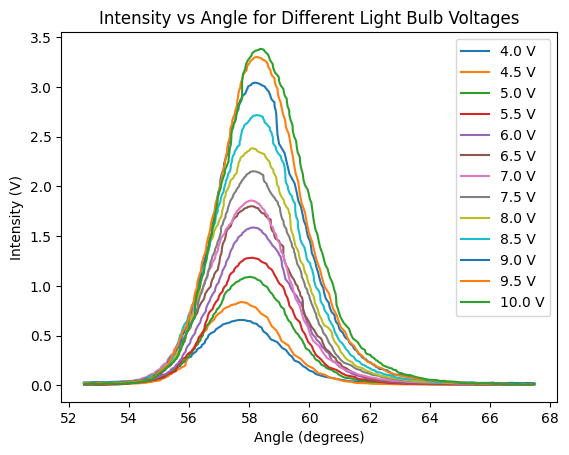

In [138]:
# load data from angle_data folder
# each file name is value.txt, where value is 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0
# contains angle, intensity

# load data from angle_data folder
index = 0
for name in np.arange(4.0, 10.5, 0.5):
    data = np.loadtxt('angle_data_mar13/{}.txt'.format(name), skiprows=2)
    angle = data[:, 0]
    
    intensity = data[:, 1]
    intensity = intensity - intensity.min()
    angle = angle * np.pi / 180
    angle = unp.uarray(angle, u_init_angle)
    angle = init_angle - angle
    n = unp.sqrt((2/3**0.5 * unp.sin(angle) + 0.5)**2 + 3/4)
    # filter all n <= 1.69
    intensity = intensity[unp.nominal_values(angle/np.pi * 180) > 52.5]
    angle = angle[unp.nominal_values(angle/np.pi * 180) > 52.5]
    intensity = intensity[unp.nominal_values(angle/np.pi * 180) < 67.5]
    angle = angle[unp.nominal_values(angle/np.pi * 180) < 67.5]
    n = n[n > 1.69]
    print(n)
    A = unc.ufloat(13900, 100)
    B = unc.ufloat(1.689, 0.001)
    wavelength = unp.sqrt(A / (n - B))
    wavelength = unp.nominal_values(wavelength)
    # label each plot with the value 
    plt.plot(unp.nominal_values(angle/np.pi * 180), intensity, label='{} V'.format(name))
    index += 1
    # plt.xlim(0.9, 1.1)

# plot vertical line at x=700
# plt.axvline(x=700, color='r', linestyle='--')
plt.xlabel('Angle (degrees)')
plt.ylabel('Intensity (V)')
plt.title('Intensity vs Angle for Different Light Bulb Voltages')
plt.legend()
plt.show()


[1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529519812022166+/-0.00027825208939940177
 1.8529519812022166+/-0.00027825208939940177
 1.8529519812022166+/-0.00027825208939940177
 1.8529519812022166+/-0.00027825208939940177
 1.8529519812022166+/-0.00027825208939940177
 1.8529519812022166+/-0.00027825208939940177
 1.8529519812022166+/-0.00027825208939940177
 1.8529519

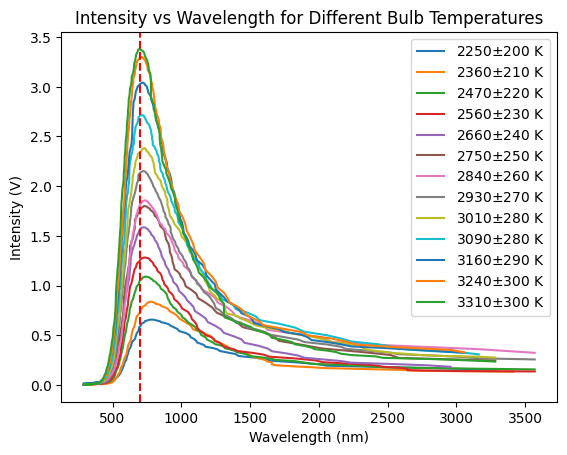

In [139]:
# load data from angle_data folder
# each file name is value.txt, where value is 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0
# contains angle, intensity

# load data from angle_data folder
index = 0
for name in np.arange(4.0, 10.5, 0.5):
    data = np.loadtxt('angle_data_mar13/{}.txt'.format(name), skiprows=2)
    angle = data[:, 0]
    
    intensity = data[:, 1]
    intensity = intensity - intensity.min()
    angle = angle * np.pi / 180
    angle = unp.uarray(angle, u_init_angle)
    angle = init_angle - angle
    n = unp.sqrt((2/3**0.5 * unp.sin(angle) + 0.5)**2 + 3/4)
    # filter all n <= 1.69
    intensity = intensity[n > 1.69]
    n = n[n > 1.69]
    print(n)
    A = unc.ufloat(13900, 100)
    B = unc.ufloat(1.689, 0.001)
    wavelength = unp.sqrt(A / (n - B))
    wavelength = unp.nominal_values(wavelength)
    # label each plot with the value 
    plt.plot(wavelength, intensity, label='{}$\pm${} K'.format(int(round(T[index].n,-1)), int(round(T[index].s,-1))))
    index += 1
    # plt.xlim(0.9, 1.1)

# plot vertical line at x=700
plt.axvline(x=700, color='r', linestyle='--')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (V)')
plt.title('Intensity vs Wavelength for Different Bulb Temperatures')
plt.legend()
plt.show()


[1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529825029489906+/-0.00027796565090125816
 1.8529519812022166+/-0.00027825208939940177
 1.8529519

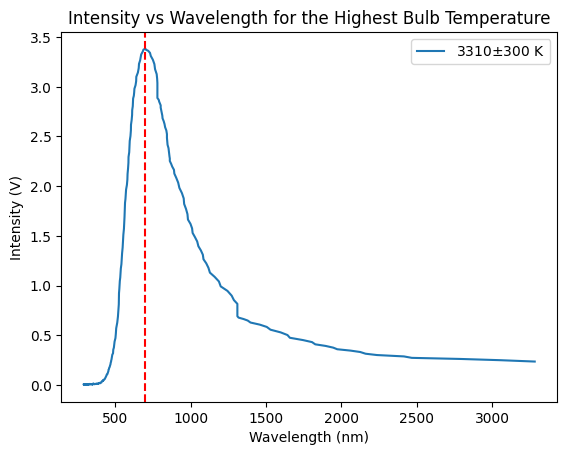

In [140]:
# load data from angle_data folder
# each file name is value.txt, where value is 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0
# contains angle, intensity

# load data from angle_data folder
index = 0
for name in np.arange(10.0, 10.5, 0.5):
    data = np.loadtxt('angle_data_mar13/{}.txt'.format(name), skiprows=2)
    angle = data[:, 0]
    
    intensity = data[:, 1]
    intensity = intensity - intensity.min()
    angle = angle * np.pi / 180
    angle = unp.uarray(angle, u_init_angle)
    angle = init_angle - angle
    n = unp.sqrt((2/3**0.5 * unp.sin(angle) + 0.5)**2 + 3/4)
    # filter all n <= 1.69
    intensity = intensity[n > 1.69]
    n = n[n > 1.69]
    print(n)
    A = unc.ufloat(13900, 100)
    B = unc.ufloat(1.689, 0.001)
    wavelength = unp.sqrt(A / (n - B))
    wavelength = unp.nominal_values(wavelength)
    # label each plot with the value 
    plt.plot(wavelength, intensity, label='{}$\pm${} K'.format(int(round(T[-1].n,-1)), int(round(T[-1].s,-1))))
    index += 1
    # plt.xlim(0.9, 1.1)

# plot vertical line at x=700
plt.axvline(x=700, color='r', linestyle='--')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (V)')
plt.title('Intensity vs Wavelength for the Highest Bulb Temperature')
plt.legend()
plt.show()
